# Aribnb Data Exploration
## by Wei Xinyu

## Introduction
> Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA. This project is to investigate on the data of airbnb and answer the following business questions.

## Business Questions

1. What are the prices of those with different room type?
2. What are the review scores of those with more availability?
3. How well can we predict the price?


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sb
%matplotlib inline

In [2]:
# load the listing data
listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# explore the general info
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

### Question 1: What are the prices of those with different room type?

For the first question, we need to wrangle the price column first. 

In [4]:
# Eliminate the $ at the beginning of the string and remove the comma
listings['price'] = listings['price'].str[1:].apply(lambda x:x.replace(",",""))

In [5]:
# Change the type from string to float
listings['price'] = listings['price'].astype('float')

In [6]:
listings['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [7]:
#Plot the hist plot of specific column value
def hist_plot(df, column_name, column_value, hist_name):
    base_color = sb.color_palette()[0]
    filtered_df = df[df[column_name] == column_value][hist_name]
    print(filtered_df.describe())
    filtered_df.hist(bins=20)
    plt.title("Price Distribution with " + column_value)

count    2541.000000
mean      155.843369
std        96.551181
min        39.000000
25%        99.000000
50%       126.000000
75%       179.000000
max      1000.000000
Name: price, dtype: float64


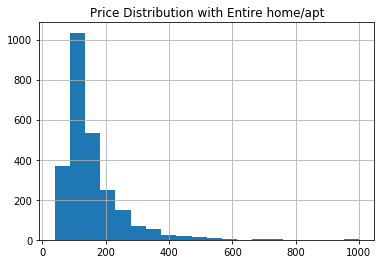

In [8]:
hist_plot(listings, 'room_type', 'Entire home/apt', 'price')

count    1160.000000
mean       75.044828
std        34.603905
min        20.000000
25%        55.000000
50%        69.000000
75%        87.000000
max       399.000000
Name: price, dtype: float64


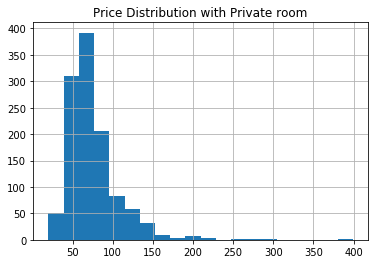

In [9]:
hist_plot(listings, 'room_type', 'Private room', 'price')

count    117.000000
mean      47.547009
std       19.372704
min       22.000000
25%       35.000000
50%       40.000000
75%       55.000000
max      118.000000
Name: price, dtype: float64


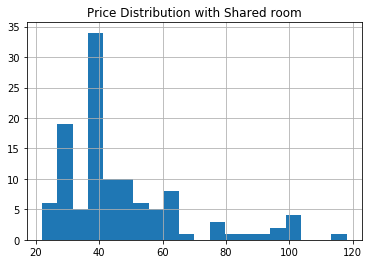

In [10]:
hist_plot(listings, 'room_type', 'Shared room', 'price')

In [11]:
#Plot the box plot
def box_plot(df, x, y):
    plt.figure(figsize = [16, 5])
    base_color = sb.color_palette()[0]

    sb.boxplot(data=df, x=x, y=y, color=base_color)
    plt.xticks(rotation=15);
    plt.title("Price VS. Room Type ")

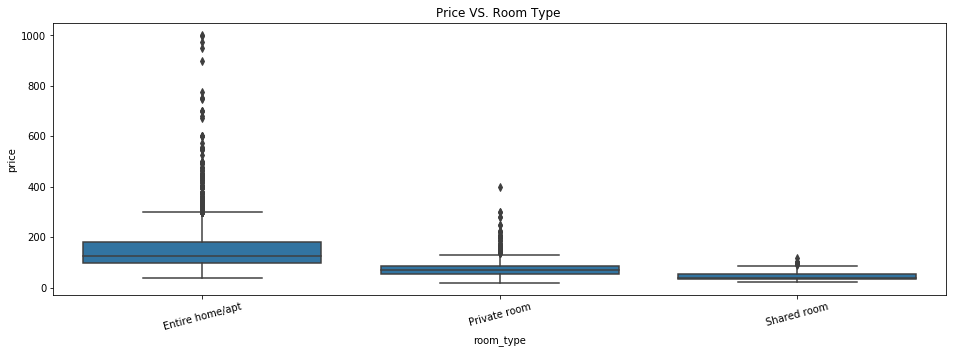

In [12]:
box_plot(listings, 'room_type', 'price')

From the hist plot and box plot above, we can find that in general, the price of Entire home is higher than that of Private room, and the price of Private room is higher than that of Shared room. 

### Question 2: What are the review scores of those with more availability?

For the second questions, we use the availability in 30 days as the metric of availability and review score rating as the review score. We explore the distribution of availability_30 first.

Text(0.5,1,'Distribution of Availability in 30 days')

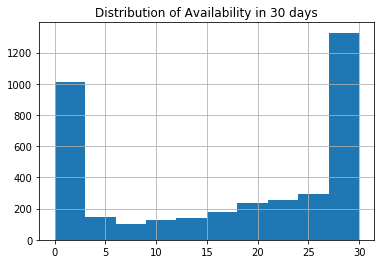

In [13]:
listings['availability_30'].hist()
plt.title("Distribution of Availability in 30 days")

From the plot above, we can get the data concentrate at two peaks, below 5 and above 25. So we will compare the review scores in these two ranges.

In [14]:
high_availability = listings[listings['availability_30'] > 25]
low_availability = listings[listings['availability_30'] < 5]

Text(0.5,1,'Distribution of Review Scores with High Availability in 30 days')

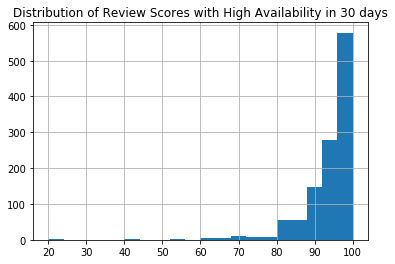

In [20]:
high_availability['review_scores_rating'].hist(bins=20)
plt.title("Distribution of Review Scores with High Availability in 30 days")

In [24]:
print("Distribution of High Availability")
high_availability['review_scores_rating'].describe()

Distribution of High Availability


count    1152.000000
mean       93.731771
std         7.231322
min        20.000000
25%        91.000000
50%        96.000000
75%        98.000000
max       100.000000
Name: review_scores_rating, dtype: float64

Text(0.5,1,'Distribution of Review Scores with Low Availability in 30 days')

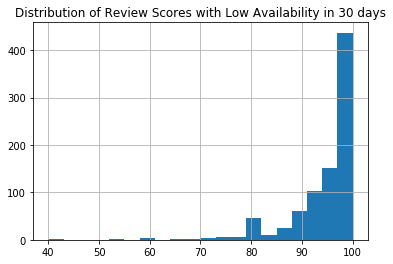

In [21]:
low_availability['review_scores_rating'].hist(bins=20)
plt.title("Distribution of Review Scores with Low Availability in 30 days")

In [25]:
print("Distribution of Low Availability")
low_availability['review_scores_rating'].describe()

Distribution of Low Availability


count    855.000000
mean      94.591813
std        7.253889
min       40.000000
25%       92.000000
50%       97.000000
75%      100.000000
max      100.000000
Name: review_scores_rating, dtype: float64

From the plot above, we cannot see clear difference between the review scores distribution of the low availability and high availability.

count    3171.000000
mean       94.539262
std         6.606083
min        20.000000
25%        93.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64

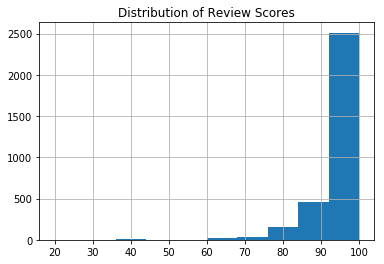

In [23]:
listings['review_scores_rating'].hist()
plt.title("Distribution of Review Scores")
listings['review_scores_rating'].describe()

In [18]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


### Question 3: How well can we predict the price?

For the third question, there are too many continuous variables, and some are not related to our business questions, such as id, scrape_id and host_id. We need to eliminate them first.The square_feet and license have very few values, we can also eliminate them. host_total_listings_count and host_listings_count have the same value, we can keep only one. Besides there are also some categorical columns that may be useful, so we will also keep them.

In [65]:
related_columns = listings.describe().columns.tolist()

In [66]:
cat_vars = ['host_is_superhost', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable']

In [67]:
related_columns.extend(cat_vars)

In [68]:
related_columns

['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'price',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'reviews_per_month',
 'host_is_superhost',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'instant_bookable']

In [69]:
df = listings[related_columns]

In [70]:
df = df.drop(['id', 'scrape_id', 'host_id', 'square_feet', 'license', 'host_total_listings_count', 'latitude', 'longitude'], axis=1)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 29 columns):
host_listings_count               3816 non-null float64
accommodates                      3818 non-null int64
bathrooms                         3802 non-null float64
bedrooms                          3812 non-null float64
beds                              3817 non-null float64
price                             3818 non-null float64
guests_included                   3818 non-null int64
minimum_nights                    3818 non-null int64
maximum_nights                    3818 non-null int64
availability_30                   3818 non-null int64
availability_60                   3818 non-null int64
availability_90                   3818 non-null int64
availability_365                  3818 non-null int64
number_of_reviews                 3818 non-null int64
review_scores_rating              3171 non-null float64
review_scores_accuracy            3160 non-null float64
review_scores_c

In [72]:
# Drop rows with missing price, property_type and host_is_superhost values
df = df.dropna(subset=['price', 'property_type'], axis=0)

In [73]:
# Fill numeric columns with the mean
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)

In [74]:
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    

In [75]:
df.head()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,...,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t
0,3.0,4,1.0,1.0,1.0,85.0,2,1,365,14,...,0,0,0,0,0,0,0,0,1,0
1,6.0,4,1.0,1.0,1.0,150.0,1,2,90,13,...,0,0,0,0,0,0,0,0,1,0
2,2.0,11,4.5,5.0,7.0,975.0,10,4,30,1,...,0,0,0,0,0,0,0,0,1,0
3,1.0,3,1.0,0.0,2.0,100.0,1,1,1125,0,...,0,0,0,0,0,0,0,0,1,0
4,2.0,6,2.0,3.0,3.0,450.0,6,1,1125,30,...,0,0,0,0,0,0,0,0,1,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 47 columns):
host_listings_count               3817 non-null float64
accommodates                      3817 non-null int64
bathrooms                         3817 non-null float64
bedrooms                          3817 non-null float64
beds                              3817 non-null float64
price                             3817 non-null float64
guests_included                   3817 non-null int64
minimum_nights                    3817 non-null int64
maximum_nights                    3817 non-null int64
availability_30                   3817 non-null int64
availability_60                   3817 non-null int64
availability_90                   3817 non-null int64
availability_365                  3817 non-null int64
number_of_reviews                 3817 non-null int64
review_scores_rating              3817 non-null float64
review_scores_accuracy            3817 non-null float64
review_scores_c

In [77]:
X = df.drop('price', axis=True)
y = df['price']

We found that only the room type has some correlation with the price. So we will only keep the room_type.

In [78]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

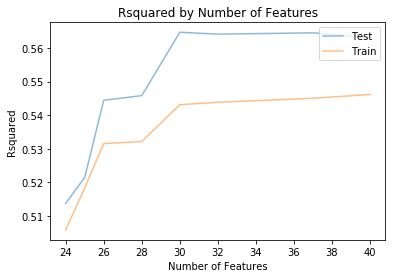

In [79]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [3000, 2500, 2000, 1500, 1000, 500, 100, 50, 20, 10]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

From the plot above, we can illustrate that the model works best with 30 features and achieve r2 score of 0.56.

In [80]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
27,room_type_Shared room,-62.372909,62.372909
26,room_type_Private room,-33.674113,33.674113
2,bathrooms,33.311574,33.311574
3,bedrooms,28.477989,28.477989
24,property_type_House,-14.653808,14.653808
25,property_type_Townhouse,-12.950379,12.950379
19,review_scores_value,-12.069231,12.069231
18,review_scores_location,10.164612,10.164612
1,accommodates,8.775649,8.775649
22,host_is_superhost_t,6.118776,6.118776


From the table above, we can see that the room type matters most. The shared room has the biggest negative correlation with the price.The private room has the second biggest negative correlation with the price. This is consistent with the conclusion of question 1: The entire home has higher price, then the private room.